In [2]:
# Do this before run:
# pip install sexpdata

# summarised numbers are in ../*/results/table_sexp.txt
# which are dumped by Core_bench

import sexpdata
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd 


matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


In [3]:
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c',
                  '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

cobalt = '#1f77b4' # color name?
blue = '#4400FF'
yellow = '#FFD500'
purple = '#e377c2'
red = '#d62728'
green = '#2ca02c'
orange = '#ff7f0e'


#sta_color = blue
#dyn_color = yellow
sta_color = cobalt
dyn_color = orange
bare_color = green
cps_color = red


def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)
    
def scale(xs):
    return [x/1000 for x in xs]

def mkdataIdx(dic, kind, labels, key='time_per_run_nanos'):
    return [dic[kind+':'+x][key]/1000 for x in labels]

def mkdata(dic, kind, key='time_per_run_nanos'):
    return [dic[kind][key] /1000]


In [4]:
# convert benchmark sexp to a list of dicts
def load_sexp(fname):
    txt = Path(fname).read_text()
    rows = sexpdata.loads(txt)
    rows = [dict((sym.value(),val) for [sym,val] in row) for row in rows]
    rows = dict((row['full_benchmark_name'].value(),row) for row in rows)
    return rows

# display(rows)

ping = load_sexp('../pingpong/results/table_sexp.txt')
bare = load_sexp('../bare_pingpong/results/table_sexp.txt')
nping = load_sexp('../nping/results/table_sexp.txt')
cham = load_sexp('../chameleons/results/table_sexp.txt')
champ = load_sexp('../chameleons/results_pipes/table_sexp.txt')




In [102]:
def nums0():
    display(ping['ev_dynamic']['time_per_run_nanos'] / bare['ev_bare']['time_per_run_nanos'])
    display(ping['lwt_dynamic']['time_per_run_nanos'] / bare['lwt_bare']['time_per_run_nanos'])
    display(ping['ev_static']['time_per_run_nanos'] / bare['ev_bare']['time_per_run_nanos'])
    display(ping['lwt_static']['time_per_run_nanos'] / bare['lwt_bare']['time_per_run_nanos'])
    display(ping['ipc_static:1']['time_per_run_nanos'] / bare['ipc-bare_ideal:1']['time_per_run_nanos'])
    display(ping['ipc_static:1000']['time_per_run_nanos'] / bare['ipc-bare_ideal:1000']['time_per_run_nanos'])
    display(ping['ipc_dynamic:1']['time_per_run_nanos'] / bare['ipc-bare_ideal:1']['time_per_run_nanos'])
    display(ping['ipc_dynamic:1000']['time_per_run_nanos'] / bare['ipc-bare_ideal:1000']['time_per_run_nanos'])

def nums():
    for j in [1,10,100,1000]:
        i = str(j)
        display(i + ':' + 
                str(ping['ipc_static:'+i]['time_per_run_nanos'] / bare['ipc-bare_ideal:'+i]['time_per_run_nanos']))
    for j in [1,10,100,1000]:
        i = str(j)
        display(i + ':' + 
                str(ping['ipc_dynamic:'+i]['time_per_run_nanos'] / bare['ipc-bare_ideal:'+i]['time_per_run_nanos']))


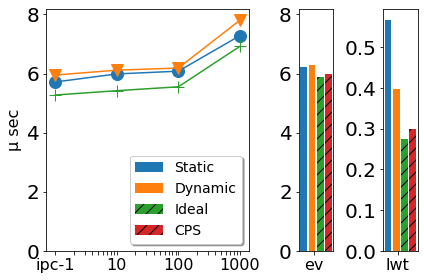

In [99]:


def show_ev_ipc2():   
    #fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    #ax = axes[0][0]
    # fig,axes = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 1]}, squeeze = False)
    fig = plt.figure()
    gs = plt.GridSpec(1, 5, figure=fig)
    ax = fig.add_subplot(gs[0,0:3])
    ax2 = fig.add_subplot(gs[0,3], sharey=ax)
    ax3 = fig.add_subplot(gs[0,4])
    #ax = axes[0][0]
    #ax2 = axes[0][1]
    #ax3 = axes[0][2]
    # sharey='row', 
    color1 = sta_color
    color2 = dyn_color
    color3 = bare_color
    color4 = cps_color
    
    lab1 = 'Static'
    lab2 = 'Dynamic'
    lab3 = 'Ideal'
    lab4 = 'CPS'
    
    x = [1,10,100,1000]
    xlabs = [str(xi) for xi in x]
    ax.set_xscale('log')
    
    ax.plot(x, mkdataIdx(ping,'ipc_static',xlabs), color=color1, marker='o', markersize=12)
    ax.plot(x, mkdataIdx(ping,'ipc_dynamic',xlabs), color=color2, marker='v', markersize=12)
    ax.plot(x, mkdataIdx(bare,'ipc-bare_ideal',xlabs), color=color3, marker='+', markersize=12)
    ax.plot([], [], color=color4)

    
    ax.bar([0], [0], 0, color=color1, label=lab1, hatch='') 
    ax.bar([0], [0], 0, color=color2, label=lab2, hatch='') 
    ax.bar([0], [0], 0, color=color3, label=lab3, hatch='//') 
    ax.bar([0], [0], 0, color=color4, label=lab4, hatch='//') 
    legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
    legend.get_frame().set_facecolor('#FFFFFF')
    ax.set_ylabel('μ sec', fontsize=16) 
    
    ten = np.arange(1,10)
    ticks =  np.concatenate([ten, ten * 10, ten * 100, [1000]])
    ax.set_xticks(ticks)
    
    xlabs = [str(xi) if xi in [1,10,100,1000] else '' for xi in ticks]
    xlabs[0] = 'ipc-1'
    ax.set_xticklabels(xlabs, fontsize=16)
    
    width = 0.25
    colwidth = width*0.8
    x = np.arange(1) - 0.3
    ax2.bar(x, mkdata(ping,'ev_static'), colwidth, color=color1) 
    ax2.bar(x + width*1, mkdata(ping,'ev_dynamic'), colwidth, color=color2)
    ax2.bar(x + width*2, mkdata(bare,'ev_bare'), colwidth, color=color3, hatch='//') 
    ax2.bar(x + width*3, mkdata(bare,'ev_bare_cps'), colwidth, color=color4, hatch='//')
    ax2.set_xticks([0])
    ax2.set_xticklabels(['ev'], fontsize=16)

    ax3.bar(x, mkdata(ping,'lwt_static'), colwidth, color=color1) 
    ax3.bar(x + width*1, mkdata(ping,'lwt_dynamic'), colwidth, color=color2)
    ax3.bar(x + width*2, mkdata(bare,'lwt_bare'), colwidth, color=color3, hatch='//') 
    ax3.bar(x + width*3, mkdata(bare,'lwt_bare_cps'), colwidth, color=color4, hatch='//')
    ax3.set_xticks([0])
    ax3.set_xticklabels(['lwt'], fontsize=16)
    
    
    plt.tight_layout()
    #make_space_above(axes, topmargin=0.4)

    #plt.savefig('pingpong_ipc.pdf', format='pdf', pad_inches=0)
    plt.show()

show_ev_ipc2()


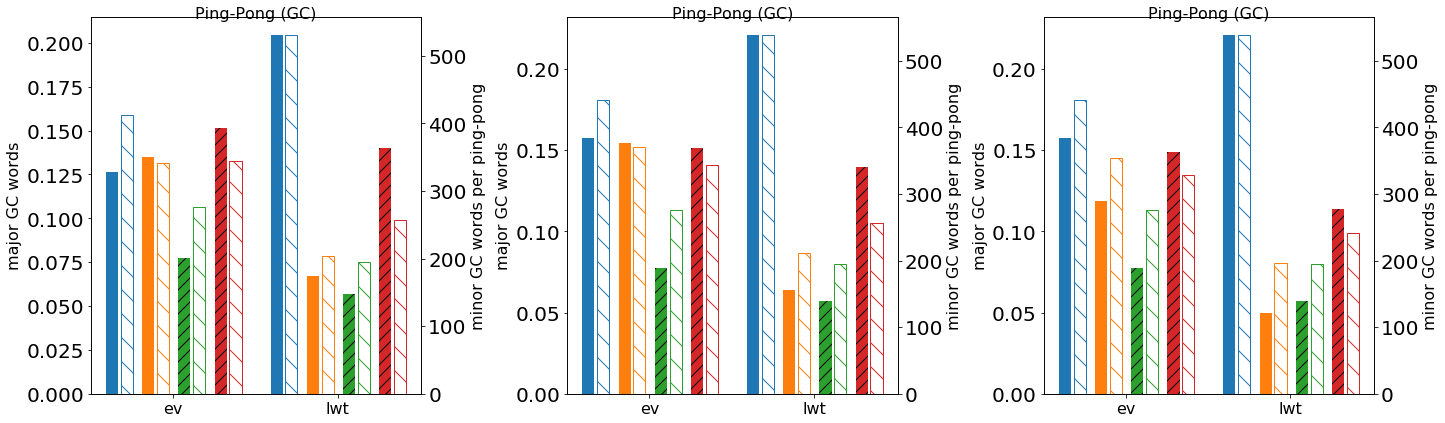

In [107]:
def show_mem(ax,dyn_suffix='',sta_suffix='',cps_suffix=''):
    ax2 = ax.twinx()

    width = 0.22

    xlabs = ['ev', 'lwt']
    zero = [0.0 for x in xlabs]

    mjgc = 'major_words_per_run'
    show_graph4(axes, ax, width, width/3,
              xlabs,
              [ping['ev_static'+sta_suffix][mjgc]]+[ping['lwt_static'+sta_suffix][mjgc]], 'Static'+sta_suffix,
              [ping['ev_dynamic'+dyn_suffix][mjgc]]+[ping['lwt_dynamic'+dyn_suffix][mjgc]], 'Dynamic'+dyn_suffix,
              [bare['ev_bare'][mjgc]]+[bare['lwt_bare'][mjgc]], 'Ideal',
              [bare['ev_bare_cps'+cps_suffix][mjgc]]+[bare['lwt_bare_cps'+cps_suffix][mjgc]], 'CPS'+cps_suffix,
              bare=True,
                shift=-0.15
              )
    ax.set_ylabel('major GC words', fontsize=16) 

    mngc = 'minor_words_per_run'
    show_graph4(axes, ax2, width, width/3,
              xlabs,
              [ping['ev_static'+sta_suffix][mngc]]+[ping['lwt_static'+sta_suffix][mngc]], 'Static'+sta_suffix,
              [ping['ev_dynamic'+dyn_suffix][mngc]]+[ping['lwt_dynamic'+dyn_suffix][mngc]], 'Dynamic'+dyn_suffix,
              [bare['ev_bare'][mngc]]+[bare['lwt_bare'][mngc]], 'Ideal',
              [bare['ev_bare_cps'+cps_suffix][mngc]]+[bare['lwt_bare_cps'+cps_suffix][mngc]], 'CPS'+cps_suffix,
              bare=True, shift=-0.06, minor=True
              )

    # k='time_per_run_nanos'

    ax.set_title ('Ping-Pong (GC)', fontsize=16, y=0.98)
    ax2.set_ylabel('minor GC words per ping-pong', fontsize=16) 
    #legend = ax2.legend(loc='lower left', shadow=True, fontsize=14)
    #legend.get_frame().set_facecolor('#FFFFFF')


fig, axes = plt.subplots(ncols=3, nrows=1, squeeze = False)
fig.set_figheight(6)
fig.set_figwidth(20)
ax = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[0][2]

show_mem(ax,)
show_mem(ax2,'_untyped','_untyped')
show_mem(ax3,'_nocheck_untyped','_untyped','_nocheck')

plt.tight_layout()
plt.show()


/Users/keigoi/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


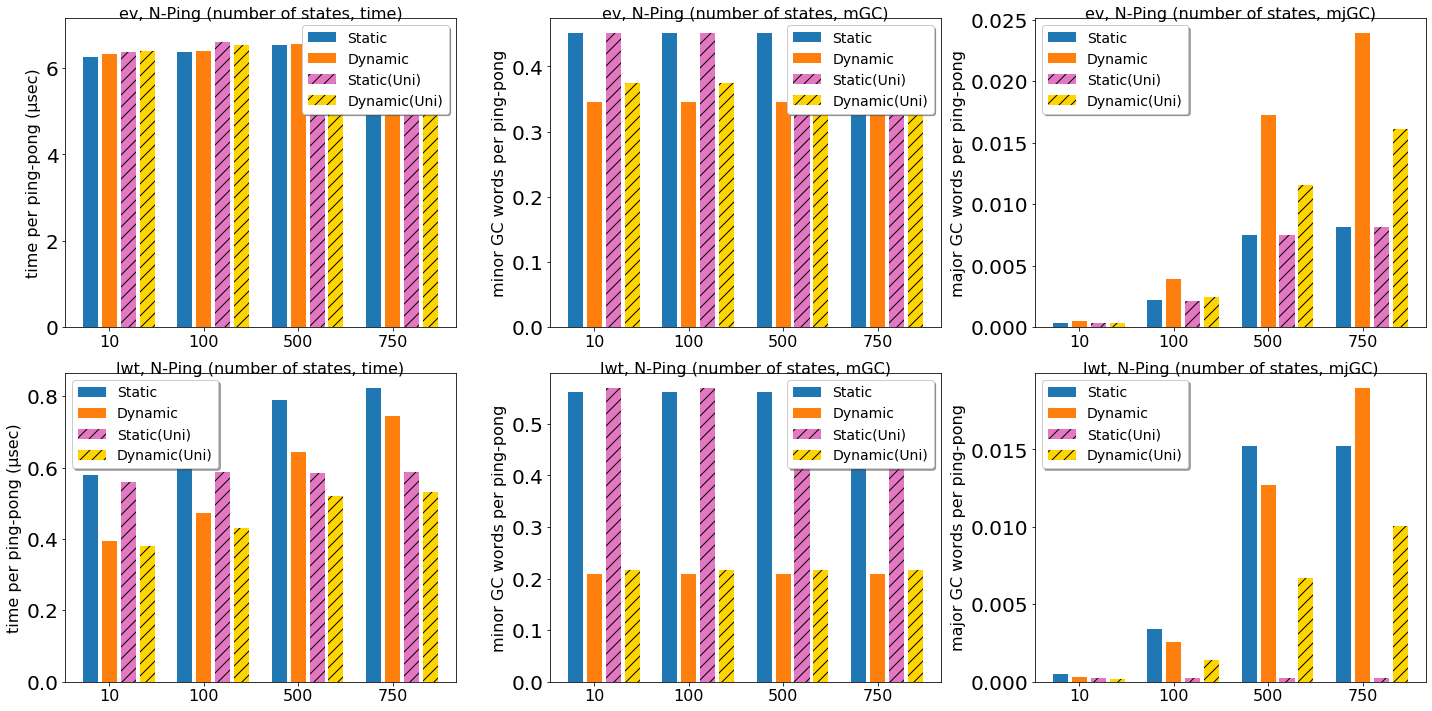

In [114]:

def show_graph4_2(axes, ax, width, colwidth, x_labels, d1,lab1,d2,lab2,d3,lab3,d4,lab4):
    x = np.arange(len(x_labels))
    ax.bar(x, d1, colwidth, color=sta_color, label=lab1, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, )#hatch='x') 
    ax.bar(x + width, d2, colwidth, color=dyn_color, label=lab2, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, )#hatch='x')
    ax.bar(x + width * 2, d3, colwidth, color=purple, label=lab3, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 
    if lab4!='':
        ax.bar(x + width * 3, d4, colwidth, color=yellow, label=lab4, error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 

    ax.set_xticks(x + width)
    ax.set_xticklabels(x_labels, fontsize=16)


def show_nping(ax,title, k,ts,ylabel,loc='lower_right'):
    width = 0.20
    
    xlabs = ['10', '100', '500', '750']
    zero = [0.0 for x in xlabs]
    

    # time_per_run_nanos
    show_graph4_2(axes, ax, width, width*0.8,
              xlabs,
              mkdataIdx(nping,ts[0],xlabs,k), 'Static',
              mkdataIdx(nping,ts[1],xlabs,k), 'Dynamic',
              mkdataIdx(nping,ts[2],xlabs,k), 'Static(Uni)',
              mkdataIdx(nping,ts[3],xlabs,k), 'Dynamic(Uni)',
              )

    k='time_per_run_nanos'

    ax.set_title (title, fontsize=16, y=0.98)
    ax.set_ylabel(ylabel, fontsize=16) 
    legend = ax.legend(loc=loc, shadow=True, fontsize=14)
    legend.get_frame().set_facecolor('#FFFFFF')



def show_nping_do():
    fig, axes = plt.subplots(ncols=3, nrows=2, squeeze = False)
    fig.set_figheight(10)
    fig.set_figwidth(20)


    ev = ['ev_static', 'ev_dynamic', 'ev_static_untyped', 'ev_dynamic_untyped']
    show_nping(axes[0][0], 'ev, N-Ping (number of states, time)', 'time_per_run_nanos', ev, 'time per ping-pong (μsec)')
    show_nping(axes[0][1], 'ev, N-Ping (number of states, mGC)', 'minor_words_per_run', ev, 'minor GC words per ping-pong')
    show_nping(axes[0][2], 'ev, N-Ping (number of states, mjGC)', 'major_words_per_run', ev, 'major GC words per ping-pong', 'upper left')


    lwt = ['lwt_static', 'lwt_dynamic', 'lwt_static_untyped', 'lwt_dynamic_untyped']
    show_nping(axes[1][0], 'lwt, N-Ping (number of states, time)', 'time_per_run_nanos', lwt, 'time per ping-pong (μsec)')

    show_nping(axes[1][1], 'lwt, N-Ping (number of states, mGC)', 'minor_words_per_run', lwt, 'minor GC words per ping-pong')

    show_nping(axes[1][2], 'lwt, N-Ping (number of states, mjGC)', 'major_words_per_run', lwt, 'major GC words per ping-pong', 'upper left')


    plt.tight_layout()
    plt.show()
    
show_nping_do()


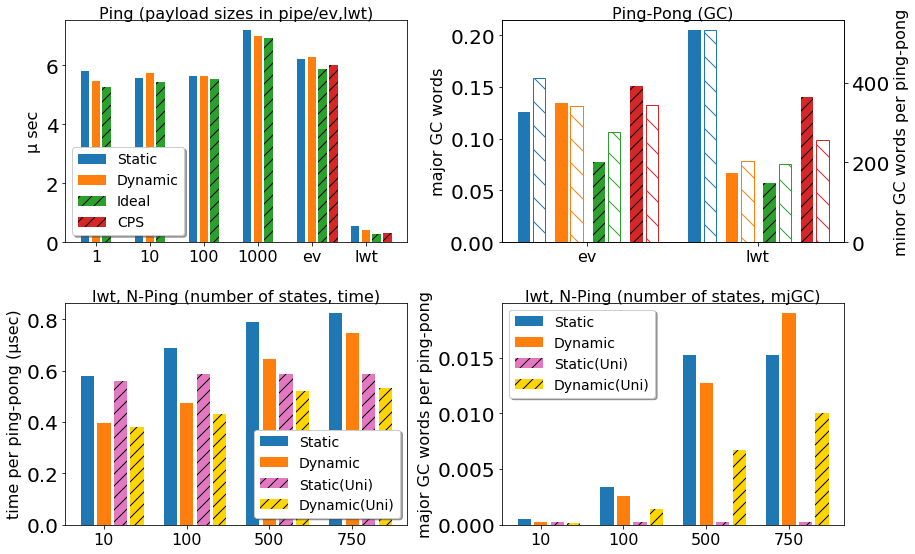

In [7]:




fig, axes = plt.subplots(ncols=2, nrows=2, squeeze = False)
fig.set_figheight(8)
fig.set_figwidth(13)

ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]

show_ev_ipc(ax1)

show_mem(ax2)


lwt = ['lwt_static', 'lwt_dynamic', 'lwt_static_untyped', 'lwt_dynamic_untyped']
show_nping(ax3, 'lwt, N-Ping (number of states, time)', 'time_per_run_nanos', lwt, 'time per ping-pong (μsec)', 'lower right')

show_nping(ax4,'lwt, N-Ping (number of states, mjGC)', 'major_words_per_run', lwt, 'major GC words per ping-pong', 'upper left')

plt.tight_layout()

plt.savefig('main_graph.pdf', format='pdf', pad_inches=0)
plt.show()




In [8]:
def show_pingpong():
    sta = [
        ping['ev_static_untyped']['time_per_run_nanos'],
        ping['ipc_static:1']['time_per_run_nanos'],
        ping['ipc_static:1000']['time_per_run_nanos'],
    ]

    dyn = [
        ping['ev_dynamic']['time_per_run_nanos'],
        ping['ipc_dynamic:1']['time_per_run_nanos'],
        ping['ipc_dynamic:1000']['time_per_run_nanos'],
    ]

    zero = [
        0.0, 0.0, 0.0
    ]

    barecaml = [
        bare['lwt_bare']['time_per_run_nanos'],
        bare['ev_bare']['time_per_run_nanos'],
        0.0
    #    bare['ipc_bare']['time_per_run_nanos'],        
    #    bare['lwt_bare']['time_per_run_nanos']
    #    bare['lwt_bare_mimic-mpst']['time_per_run_nanos']
    ]
    cpscaml = [
        bare['lwt_bare_cps']['time_per_run_nanos'],
        bare['ev_bare_cps']['time_per_run_nanos'],
        0.0
    #    bare['lwt_bare']['time_per_run_nanos']
    #    bare['lwt_bare_mimic-mpst']['time_per_run_nanos']
    ]

    lwt_dyn = [
        ping['lwt_dynamic']['time_per_run_nanos'],
        ping['ev_dynamic']['time_per_run_nanos'],
        ping['ipc_dynamic:1']['time_per_run_nanos'],
    ]
    lwt_sta = [
        ping['lwt_static_untyped']['time_per_run_nanos'],
        ping['ev_static_untyped']['time_per_run_nanos'],
        ping['ipc_static:1']['time_per_run_nanos'],
    ]

    fig, axes = plt.subplots(1, 2, 
                             gridspec_kw={'width_ratios': [2, 3]},
                             squeeze = False)
    (ax_lwt, ax_evpipe) = axes[0][0], axes[0][1]

    def scale(xs):
        return [x/1000 for x in xs]

    def evpipe():
        width = 0.4
        x = np.arange(3)
        dyn_ = scale(dyn)
        sta_ = scale(sta)
        ax_evpipe.bar(x, dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 

        ax_evpipe.bar(x + width, sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        # for legends
        ax_evpipe.bar(x + width, zero, width*0.8, color=bare_color, label='Bare', hatch='//') 

        ax_evpipe.set_xticks(x + width/2)
        ax_evpipe.set_xticklabels(['ev', 'p-1', 'p-1000'], fontsize=20)
        legend = ax_evpipe.legend(loc='lower right', shadow=True, fontsize=20)
        legend.get_frame().set_facecolor('#FFFFFF')

        
    def lwt():
        width = 0.2
        lwt_dyn_ = scale(lwt_dyn)
        lwt_sta_ = scale(lwt_sta)
        bare_ = scale(barecaml)
        cpscaml_ = scale(cpscaml)
        x = np.arange(3)
        ax_lwt.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dyn', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width, lwt_sta_, width*0.8, color=sta_color, label='Sta', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width*2, bare_, width*0.8, color=bare_color, label='Bare', error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 
        ax_lwt.bar(x + width*3, cpscaml_, width*0.8, color=cps_color, label='Bare', error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 
        ax_lwt.set_xticks(x+width)
        ax_lwt.set_xticklabels(['lwt', 'ev', 'ipc'], fontsize=20)
        #ax_lwt.set_ylabel('nano sec', fontsize=16) 

    evpipe()
    lwt()

    ax_lwt.set_ylabel('micro sec', fontsize=16) 
    fig.suptitle ('Ping Pong', fontsize=16, y=0.98)

    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    #plt.savefig('pingpong.pdf', format='pdf', pad_inches=0)
    plt.show()


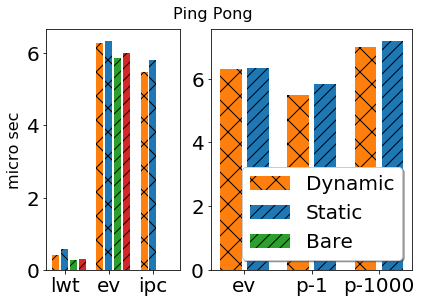

In [9]:
show_pingpong()

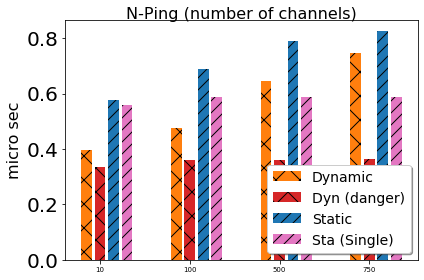

In [47]:
def show_nping_():
    lwt_dyn = [
#        nping['lwt_dynamic:1']['time_per_run_nanos'],
#        nping['lwt_dynamic:5']['time_per_run_nanos'],
        nping['lwt_dynamic:10']['time_per_run_nanos'],
#        nping['lwt_dynamic:20']['time_per_run_nanos'],
        nping['lwt_dynamic:100']['time_per_run_nanos'],
        nping['lwt_dynamic:500']['time_per_run_nanos'],
        nping['lwt_dynamic:750']['time_per_run_nanos'],
    ]
    
    lwt_dyn_fresh = [
        nping['lwt_dynamic_fresh:10']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:100']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:500']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:750']['time_per_run_nanos'],
    ]
    lwt_dyn_nocheck = [
        nping['lwt_dynamic_nocheck:10']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:100']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:500']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:750']['time_per_run_nanos'],
    ]
    lwt_dyn_danger = [
        nping['lwt_dynamic_nocheck_untyped:10']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:100']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:500']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:750']['time_per_run_nanos'],
    ]
    lwt_sta = [
        nping['lwt_static:10']['time_per_run_nanos'],
        nping['lwt_static:100']['time_per_run_nanos'],
        nping['lwt_static:500']['time_per_run_nanos'],
        nping['lwt_static:750']['time_per_run_nanos'],
    ]
    lwt_sta_untyped = [
        nping['lwt_static_untyped:10']['time_per_run_nanos'],
        nping['lwt_static_untyped:100']['time_per_run_nanos'],
        nping['lwt_static_untyped:500']['time_per_run_nanos'],
        nping['lwt_static_untyped:750']['time_per_run_nanos'],
    ]
    lwt_dyn_ = scale(lwt_dyn)
    lwt_dyn_fresh_ = scale(lwt_dyn_fresh)
    lwt_dyn_nocheck_ = scale(lwt_dyn_nocheck)
    lwt_dyn_danger_ = scale(lwt_dyn_danger)
    lwt_sta_ = scale(lwt_sta)
    lwt_sta_untyped_ = scale(lwt_sta_untyped)
    
#    x_labels = ['1', '5', '10', '20', '100', '500', '750']
    x_labels = ['10', '100', '500', '750']
    x = np.arange(4)

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    def lwt():
        width = 0.15
        ax.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax.bar(x + width, lwt_dyn_danger_, width*0.8, color=red, label='Dyn (danger)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x')
        ax.bar(x + width * 2, lwt_sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 
        ax.bar(x + width * 3, lwt_sta_untyped_, width*0.8, color=purple, label='Sta (Single)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        ax.set_xticks(x + width)
        ax.set_xticklabels(x_labels, fontsize=7)
        legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
        legend.get_frame().set_facecolor('#FFFFFF')


    lwt()

    ax.set_ylabel('micro sec', fontsize=16) 
#    ax.set_xlabel('Number of channels', fontsize=16) 
    ax.set_title ('N-Ping (number of channels)', fontsize=16, y=0.98)


    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    #plt.savefig('nping.pdf', format='pdf', pad_inches=0)
    plt.show()

show_nping_()

In [13]:
-

SyntaxError: invalid syntax (<ipython-input-13-0a1f21a34173>, line 1)

In [14]:
show_chameleons()


NameError: name 'show_chameleons' is not defined

In [15]:
def show_chameleons_ipc():
    ipc_dyn = [
#        champ['ipc_dynamic:3']['time_per_run_nanos'],
        champ['ipc_dynamic:25']['time_per_run_nanos'],
        champ['ipc_dynamic:50']['time_per_run_nanos'],
        champ['ipc_dynamic:75']['time_per_run_nanos'],
        champ['ipc_dynamic:100']['time_per_run_nanos'],
        champ['ipc_dynamic:500']['time_per_run_nanos'],
        champ['ipc_dynamic:1000']['time_per_run_nanos'],
    ]
    ipc_sta = [
#        champ['ipc_static:3']['time_per_run_nanos'],
        champ['ipc_static:25']['time_per_run_nanos'],
        champ['ipc_static:50']['time_per_run_nanos'],
        champ['ipc_static:75']['time_per_run_nanos'],
        champ['ipc_static:100']['time_per_run_nanos'],
        champ['ipc_static:500']['time_per_run_nanos'],
        champ['ipc_static:1000']['time_per_run_nanos'],
#        champ['ipc_static:2500']['time_per_run_nanos'],
#        champ['ipc_static:5000']['time_per_run_nanos'],
    ]
    ipc_lwt_dyn = [
#        champ['lwt_ipc_dynamic:3']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:25']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:50']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:75']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:100']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:500']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:1000']['time_per_run_nanos'],
#        champ['lwt_ipc_dynamic:2500']['time_per_run_nanos'],
#        champ['lwt_ipc_dynamic:5000']['time_per_run_nanos'],
    ]

    ipc_dyn = scale(ipc_dyn)
    ipc_sta = scale(ipc_sta)
    ipc_lwt_dyn = scale(ipc_lwt_dyn)
    
#    x_labels = [3, 25, 50, 75, 100, 500, 1000]
    x_labels = [25, 50, 75, 100, 500, 1000]
    x = np.arange(len(x_labels))

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    def lwt():
        width = 0.15
        ax.bar(x, ipc_lwt_dyn, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax.bar(x + width, ipc_dyn, width*0.8, color=red, label='Dyn (Lwt)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x')
        ax.bar(x + width * 2, ipc_sta, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 
#        ax.bar(x + width * 3, lwt_sta_untyped, width*0.8, color=purple, label='Sta (Single)', error_kw={'ecolor':'black',
#                                  'linewidth':2,'capthick':2}, hatch='//') 

        ax.set_xticks(x + width)
        ax.set_xticklabels(x_labels, fontsize=10)
        ax.set_yscale('log')
        legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
        legend.get_frame().set_facecolor('#FFFFFF')


    lwt()

    ax.set_ylabel('micro sec', fontsize=16) 
#    ax.set_xlabel('Number of channels', fontsize=16) 
    ax.set_title ('Chameleon via Pipes (number of sessions)', fontsize=16, y=0.98)


    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    #plt.savefig('nping.pdf', format='pdf', pad_inches=0)
    plt.show()


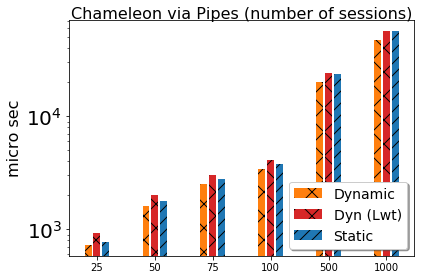

In [16]:
show_chameleons_ipc()

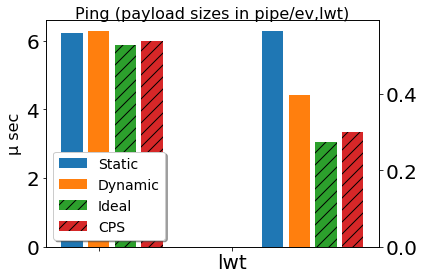

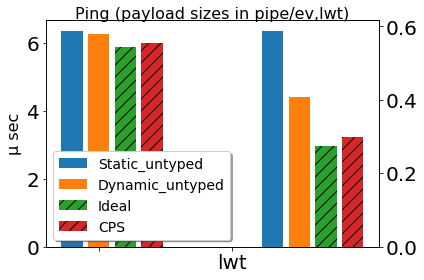

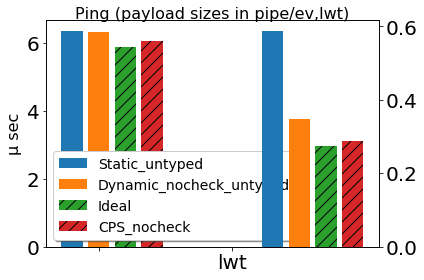

In [100]:

def show_twin(ax,suffix='',sta_suffix='', cps_suffix=''):
    width = 0.20
    
    show_graph4(axes, ax, width, width*0.8,
              ['ev'],
              mkdata(ping,'ev_static'+sta_suffix), 'Static'+sta_suffix,
              mkdata(ping,'ev_dynamic'+suffix), 'Dynamic'+suffix,
              mkdata(bare,'ev_bare'), 'Ideal',
              mkdata(bare,'ev_bare_cps'+cps_suffix), 'CPS'+cps_suffix
                , bare=True
              )
    ax.set_title ('Ping (payload sizes in pipe/ev,lwt)', fontsize=16, y=0.98)
    ax.set_ylabel('μ sec', fontsize=16) 

    ax2 = ax.twinx()
    show_graph4(axes, ax2, width, width*0.8,
              ['', 'lwt'],
              [0.0]+mkdata(ping,'lwt_static'+sta_suffix), 'Static'+sta_suffix,
              [0.0]+mkdata(ping,'lwt_dynamic'+suffix), 'Dynamic'+suffix,
              [0.0]+mkdata(bare,'lwt_bare'), 'Ideal',
              [0.0]+mkdata(bare,'lwt_bare_cps'+cps_suffix), 'CPS'+cps_suffix
                , bare=True
                , shift=0.5
               )
    ax.set_title ('Ping (payload sizes in pipe/ev,lwt)', fontsize=16, y=0.98)
    ax.set_ylabel('μ sec', fontsize=16) 
    
    legend = ax.legend(loc='lower left', shadow=True, fontsize=14)
    legend.get_frame().set_facecolor('#FFFFFF')


def show_twin_do(suffix='',sta_suffix='',cps_suffix=''):

    #fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]}, squeeze = False)
    #(ax0, ax) = axes[0][0], axes[0][1]

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    show_twin(ax,suffix,sta_suffix,cps_suffix)

    plt.tight_layout()
    #make_space_above(axes, topmargin=0.4)

    #plt.savefig('pingpong_ipc.pdf', format='pdf', pad_inches=0)
    plt.show()

show_twin_do()
show_twin_do('_untyped','_untyped')
show_twin_do('_nocheck_untyped','_untyped','_nocheck')
